In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import glob
import os
import metpy
import numpy as np

import xarray as xr
import metpy.calc as mpcalc
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from pint import UnitRegistry
ureg = UnitRegistry()


In [12]:
# Function to extract epoch from the first few rows of the CSV file
def extract_epoch_from_header(file):
    # Read the first few lines to find the epoch (assuming it's in a comment or a header)
    with open(file, 'r') as f:
        skiprow = f.readline()
        skiprow = skiprow.strip().split()[0]
        for line in f:
            if "startdate:" in line.lower():  # Assuming the word 'epoch' is present in the line
                # Extract the epoch date (this assumes the date is the second item in the line)
                epoch = line.strip().split()[1]
                return int(skiprow)-1, epoch[0:4]+"-"+epoch[4:6]+"-"+epoch[6:8]+" "+epoch[8:10]+":"+epoch[10:12]+":"+epoch[12:14]
    return None  # Return None if no epoch is found

# Function to load and adjust time for each CSV
def load_and_adjust_time(file):
    # Try to extract the epoch from the header or a specific column
    nskiprows,epoch = extract_epoch_from_header(file)
   
    if epoch is None:
        raise ValueError(f"Could not find epoch for file: {file}")
   
    # Load the actual data (skipping header if necessary)
    df = pd.read_csv(file, skiprows=nskiprows,sep="\\s+")  # Adjust skiprows based on where the data starts
   
    # Convert 'time' column to a datetime, assuming it's in days
    # Adjust time column to start from the epoch time found in the file
    df['starttime_dt'] = pd.to_timedelta(df['starttime'], unit='D') + pd.Timestamp(epoch)
    df = df[df.flag_T != 0.999]
    #df.index = df["starttime_dt"]
    #data["starttime_dt"] = pd.to_datetime(data["starttime"],unit='D',origin=pd.Timestamp('2015-01-01 00:41:00'))
   
    # Return the adjusted DataFrame
    return df

In [13]:
#set a working directory till NMVOC folder
working_dir = "C:\\Year1\\"
# Find all CSV files (change the path if nedded)
temperature_files = glob.glob(working_dir+"NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\*.nas")
print(temperature_files)

# this function reads and adjust times for all CSV files
dfs = []
for file in temperature_files:
    df = load_and_adjust_time(file)
    dfs.append(df)

# concatenates all DataFrames (based on time)
temperature_df = pd.concat(dfs).sort_values('starttime_dt').reset_index(drop=True)
temperature_df.index = temperature_df["starttime_dt"]
# Show combined DataFrame
print(temperature_df)

['C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20150101000000.20160722000000.aws.temperature.met.1y.1h.IT06L_aws_it0009.IT06L_aws.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20160101000000.20170511000000.aws.temperature.met.1y.1h.IT06L_CIM_Rotronic.IT06L_Rotronic.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20170101000000.20180309133800.aws.temperature.met.1y.1h.IT06L_CIM_Rotronic.IT06L_Rotronic.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20180101000000.20200105091500.aws.temperature.met.1y.1h.IT06L_CIM_Rotronic.IT06L_Rotronic.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20190101000000.20210108101537.aws.temperature.met.52w.1h.IT06L_CIM_Rotronic.IT06L_Rotronic.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN\\Ebas_240920_1140\\IT0009R.20200101000000.20210212120500.aws.temperature.met.1y.1h.IT06L_CIM_Rotronic.IT06L_Rotronic.lev2.nas', 'C:\\Year1\\NMVOC\\Meteo_ebas_CMN

In [24]:
temperature_df.starttime_dt[0].month

C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_18976\1922374773.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temperature_df.starttime_dt[0].month


1

C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_18976\2754150580.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temperature_df['T'].resample('Y').mean().plot()


<Axes: xlabel='starttime_dt'>

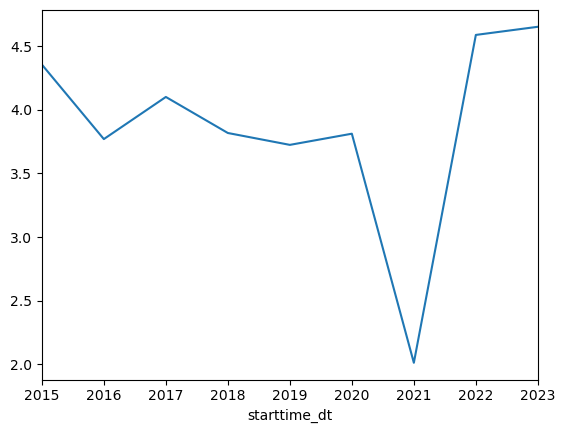

In [26]:
temperature_df['T'].resample('Y').mean().plot()

C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_18976\3937826065.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_df['T'].resample('M').mean().plot()


<Axes: xlabel='starttime_dt'>

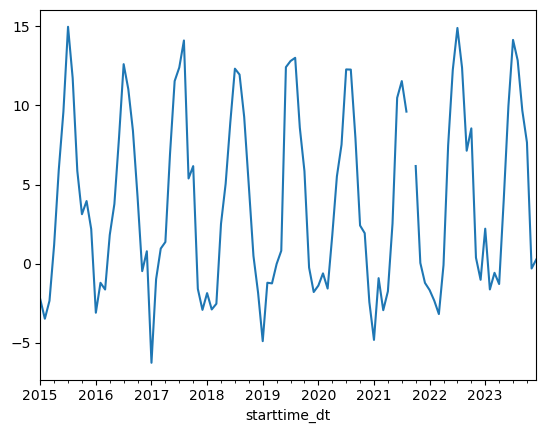

In [27]:
temperature_df['T'].resample('M').mean().plot()